Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist



Subir el archivo a google colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**1. Cargar datos**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

**2. Seleccionar caracteristicas relevantes**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
#Eliminar columnas irrelevantes
df_clean = df.drop(['CustomerID'], axis=1)

#Convertir genero a valores numericos
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

**3. Estandarizar**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**4. Calcular coeficiente cofenético y métricas para varios k**

In [ ]:
link_matrix = linkage(X_scaled, method='ward')
coph_corr, coph_dist = cophenet(link_matrix, pdist(X_scaled))
print(f"Coeficiente de correlación cofenética: {coph_corr:.4f}")



Coeficiente de correlación cofenética: 0.7209


**5. Evaluación con diferentes k**

In [ ]:
silhouette_scores = []
dbi_scores = []
ks = range(2, 11)

In [ ]:
for k in ks:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = hc.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels)
    dbi_score = davies_bouldin_score(X_scaled, labels)

    silhouette_scores.append(sil_score)
    dbi_scores.append(dbi_score)

**6. Muestra de resultados**

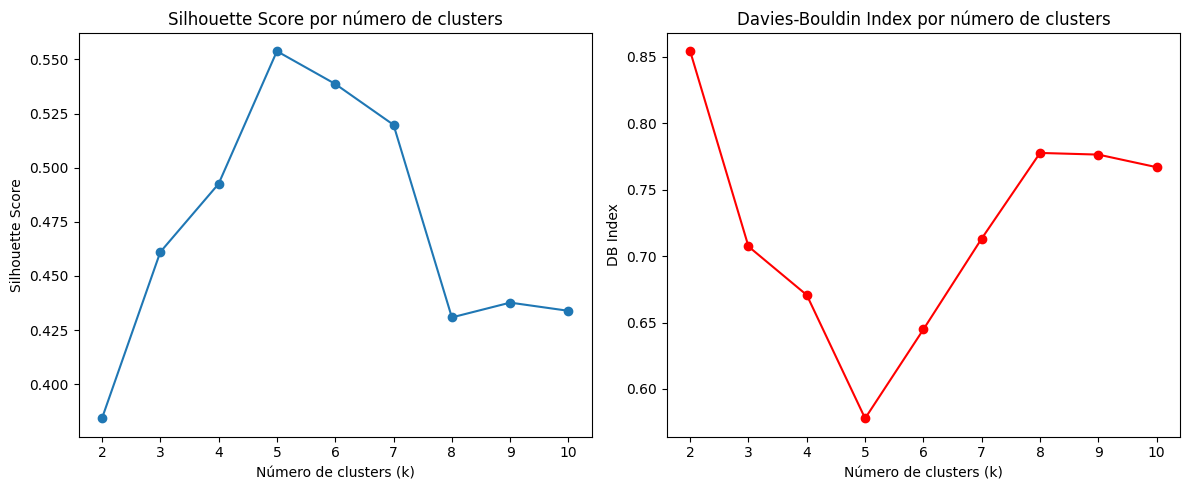

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Score por número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(ks, dbi_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index por número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

**7. Seleccion de los mejores k segun Silhouette**

In [ ]:
top_2_k = sorted(zip(ks, silhouette_scores), key=lambda x: x[1], reverse=True)[:2]
print("Top 2 k con mejor Silhouette:")
for k, score in top_2_k:
    print(f"k = {k} -> Silhouette = {score:.4f}")

Top 2 k con mejor Silhouette:
k = 5 -> Silhouette = 0.5538
k = 6 -> Silhouette = 0.5387


**8. Entrenar modelos con esos k y hacer la evaluacion**

In [ ]:
for k, _ in top_2_k:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = hc.fit_predict(X_scaled)

    ch_index = calinski_harabasz_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)

    print(f"\nModelo con k = {k}")
    print(f"Calinski-Harabasz Index: {ch_index:.2f}")
    print(f"Davies-Bouldin Index: {dbi:.4f}")


Modelo con k = 5
Calinski-Harabasz Index: 244.41
Davies-Bouldin Index: 0.5779

Modelo con k = 6
Calinski-Harabasz Index: 233.31
Davies-Bouldin Index: 0.6449


**7.  Interpretacion de resulatados**



Se aplicó el algoritmo de Hierarchical Clustering con 5 clusters sobre un subconjunto de variables del dataset Mall_Customers.csv, típicamente Annual Income (ingreso anual) y Spending Score (puntaje de gasto), que son las más relevantes para segmentar a los clientes.

El análisis de clustering jerárquico aplicado al dataset Mall_Customers.csv permitió segmentar a los clientes en grupos con patrones de comportamiento distintos, lo que facilita la toma de decisiones estratégicas en marketing. Gracias a la evaluación de múltiples métricas (Silhouette, Calinski-Harabasz, Davies-Bouldin y correlación cofenética), se pudo determinar que 3 y 5 son los valores óptimos de K, siendo 5 clústeres la opción más robusta.

Esta segmentación no solo mejora el entendimiento del perfil de los clientes, sino que también abre la puerta a campañas más efectivas, enfocadas y personalizadas según el ingreso y el comportamiento de gasto.